In [34]:
import csv
import json
from matplotlib import pyplot as plt
import numpy as np
from scipy.stats import pearsonr

In [38]:
list_of_lengths=[]
with open('D:\Bachelor\data\shipsAIS_2017_Zone17.csv', newline='') as csvfile:
        reader = csv.reader(csvfile)
        headings=next(reader)
        length=headings.index("Length")
        image_nr=headings.index("newindex")
        print(headings)
        for row in reader:
            #print("Length: {}".format(row[length]))
            #print("image_nr: {}".format(row[image_nr]))
            if row[length]!="":
                list_of_lengths.append((int(row[image_nr]),float(row[length])))
            #print(', '.join(row))
            #print("new line")
        list_of_lengths.sort(key=lambda tup: tup[1])
file_classifications = open('classifications.json', 'r')
jsonstring_classifications=file_classifications.read()
classifications = json.loads(jsonstring_classifications)
file_coordinates = open('coordinates.json', 'r')
jsonstring_coordinates=file_coordinates.read()
coordinates = json.loads(jsonstring_coordinates)

lengths=[]
accuracies=[]
for element in list_of_lengths:
    image_nr,length=element[0],element[1]
    class_attempts=classifications["ship"][str(image_nr)+".tif"]
    percentage=float(sum(class_attempts))/float(len(class_attempts))
    if str(image_nr) not in coordinates:
        lengths.append(length)
        accuracies.append(percentage)
    print("image_nr: {}; length: {}m, accuracy: {}".format(image_nr,length,percentage))

['', 'BaseDateTime', 'COG', 'CallSign', 'Cargo', 'Draft', 'Heading', 'IMO', 'LAT', 'LON', 'Length', 'MMSI', 'SOG', 'Status', 'VesselName', 'VesselType', 'Width', 'coordinate', 'datetime', 'envelope', 'url', 'non_ship', 'newindex']
image_nr: 3; length: 0.0m, accuracy: 1.0
image_nr: 8; length: 0.0m, accuracy: 1.0
image_nr: 350; length: 0.0m, accuracy: 1.0
image_nr: 354; length: 0.0m, accuracy: 0.8333333333333334
image_nr: 258; length: 8.23m, accuracy: 1.0
image_nr: 268; length: 8.23m, accuracy: 0.8333333333333334
image_nr: 286; length: 8.23m, accuracy: 0.3333333333333333
image_nr: 655; length: 8.23m, accuracy: 1.0
image_nr: 270; length: 8.84m, accuracy: 0.16666666666666666
image_nr: 302; length: 8.84m, accuracy: 1.0
image_nr: 434; length: 8.84m, accuracy: 0.6666666666666666
image_nr: 434; length: 8.84m, accuracy: 0.6666666666666666
image_nr: 840; length: 8.84m, accuracy: 0.16666666666666666
image_nr: 43; length: 9.14m, accuracy: 0.0
image_nr: 138; length: 9.75m, accuracy: 0.2857142857142

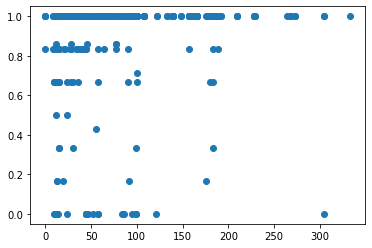

In [39]:
lengths_np=np.asarray(lengths)
accuracies_np=np.asarray(accuracies)
plt.scatter(lengths,accuracies)
plt.show()

In [40]:
corr,_=pearsonr(lengths,accuracies)
print(corr)

0.061918829640753334
